In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import nltk
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from sklearn.model_selection import train_test_split
from nltk.stem.wordnet import WordNetLemmatizer
import re
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding,Flatten,Dense,Conv1D,MaxPooling1D
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import plotly.express as px
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import Sequential
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [ ]:
# import tensorflow as tf
# tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
# tpu_strategy = tf.distribute.TPUStrategy(tpu)

In [ ]:
df = pd.read_csv("cyberbullying_tweets.csv")
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
df.loc[df['cyberbullying_type'] == 'not_cyberbullying', 'outputlabel'] = 0
df.loc[df['cyberbullying_type'] != 'not_cyberbullying', 'outputlabel'] = 1
df['outputlabel'] = df['outputlabel'].astype(int)


In [ ]:
# Encoding the labels
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['cyberbullying_type_encoded'] = labelencoder.fit_transform(df['cyberbullying_type'])

In [ ]:
df.to_csv('cyberbullying_tweets_encoded.csv', index=False)
df=pd.read_csv('cyberbullying_tweets_encoded.csv')

In [ ]:
df[['cyberbullying_type', 'cyberbullying_type_encoded']].value_counts()

cyberbullying_type   cyberbullying_type_encoded
religion             5                             7998
age                  0                             7992
gender               2                             7973
ethnicity            1                             7961
not_cyberbullying    3                             7945
other_cyberbullying  4                             7823
dtype: int64

In [ ]:
df

,tweet_text,cyberbullying_type,outputlabel,cyberbullying_type_encoded
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,3
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,3
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,3
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,3
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,1,1
47688,Turner did not withhold his disappointment. Tu...,ethnicity,1,1
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,1,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,1,1


**Let's drop duplicates**

In [ ]:
print(df.duplicated().sum())
df=df.drop_duplicates()
print(df.duplicated().sum())

42
0


**Is the dataset balanced ?**

<Axes: >

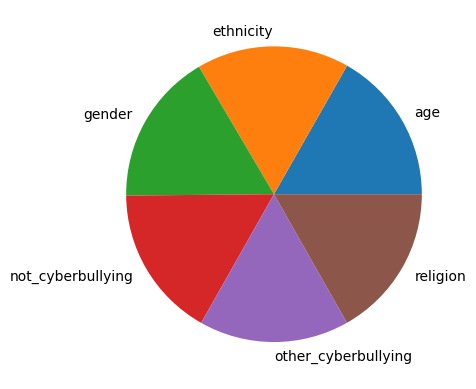

In [ ]:
df.groupby('cyberbullying_type').size().plot(kind='pie')

**How long are the messages in each category?**

In [ ]:
nltk.download('punkt')
#get the number of words in every tweet
def length(text):
    return len(word_tokenize(text))
df=df.copy()
df['word_count'] = df['tweet_text'].apply(length)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
fig = px.histogram(df, x="word_count", color="cyberbullying_type", title="Words in the tweet (including very long tweets)")
fig.show()
px.histogram(df[df.word_count<900], x="word_count", color="cyberbullying_type", title="Words in the tweet (excluding very long tweets)")

**The wordclouds for every type of cyberbullying**

Gender


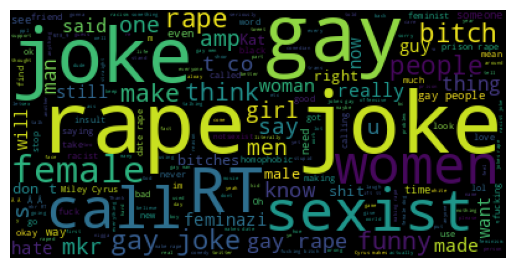

Ethnicity


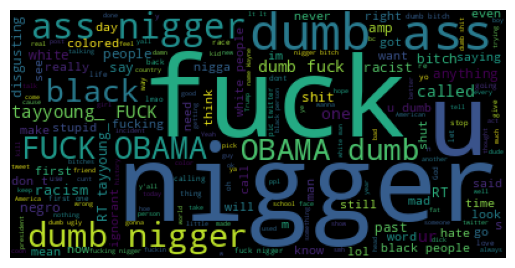

Religion


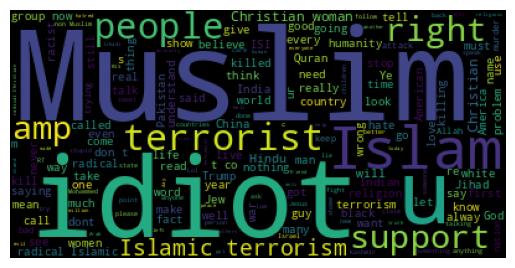

Age


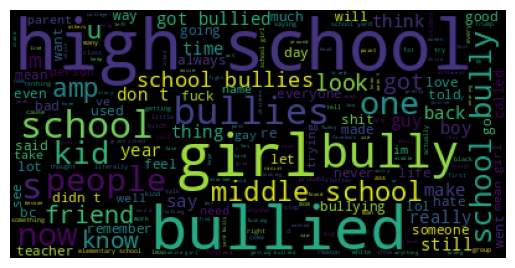

Other


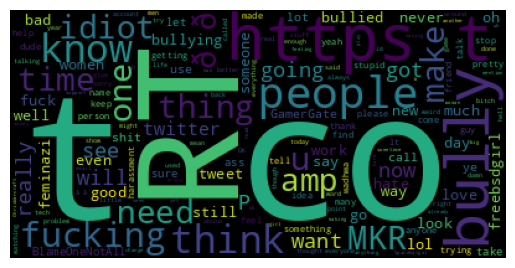

Non-bullying


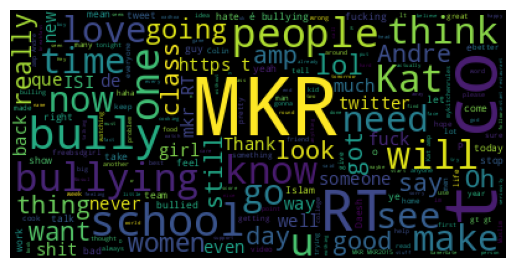

In [ ]:
print("Gender")
text = " ".join(review for review in df[df.cyberbullying_type_encoded==2].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Ethnicity")
text = " ".join(review for review in df[df.cyberbullying_type_encoded==1].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Religion")
text = " ".join(review for review in df[df.cyberbullying_type_encoded==5].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Age")
text = " ".join(review for review in df[df.cyberbullying_type_encoded==0].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Other")
text = " ".join(review for review in df[df.cyberbullying_type_encoded==4].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Non-bullying")
text = " ".join(review for review in df[df.cyberbullying_type_encoded==3].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


**Feature engineering and data preprocessing**

In [ ]:
def remove_punct(text):
  #print(text)
  return text.translate(str.maketrans('', '',string.punctuation))

df['no_punctuation'] = df['tweet_text'].apply(lambda x: remove_punct(x))

In [ ]:
df.head()

,tweet_text,cyberbullying_type,outputlabel,cyberbullying_type_encoded,word_count,no_punctuation
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,3,13,In other words katandandre your food was crapi...
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,3,25,Why is aussietv so white MKR theblock ImACeleb...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,3,12,XochitlSuckkks a classy whore Or more red velv...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,3,23,JasonGio meh P thanks for the heads up but no...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,3,22,RudhoeEnglish This is an ISIS account pretendi...


In [ ]:
df['no_punctuation']

0        In other words katandandre your food was crapi...
1        Why is aussietv so white MKR theblock ImACeleb...
2        XochitlSuckkks a classy whore Or more red velv...
3        JasonGio meh P  thanks for the heads up but no...
4        RudhoeEnglish This is an ISIS account pretendi...
                               ...                        
47687    Black ppl arent expected to do anything depend...
47688    Turner did not withhold his disappointment Tur...
47689    I swear to God This dumb nigger bitch I have g...
47690    Yea fuck you RT therealexel IF YOURE A NIGGER ...
47691    Bro U gotta chill RT CHILLShrammy Dog FUCK KP ...
Name: no_punctuation, Length: 47650, dtype: object

In [ ]:
nltk.download('stopwords')
def lower(text):
    return text.lower()
df['no_punctuation'] = df['no_punctuation'].apply(lower)
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    new_text = []
    for el in word_tokenize(text):
        if not el in stop_words:
            new_text.append(el)
    return new_text
df['no_stopwords'] = df.no_punctuation.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Let's separate words and emojis.**

In [ ]:
def smile_handle(word_list):
  new_word_list = []
  emoji_pattern = re.compile(r"([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])", flags=re.UNICODE)
  for word in word_list:
    if len(re.findall(emoji_pattern,word))!=0:
      if len(re.findall(emoji_pattern,word))!=len(word):
        new_word_list.append(re.sub(emoji_pattern,'',word))
      new_word_list.extend(re.findall(emoji_pattern,word))
      #print(word,new_word_list)
    else:
      new_word_list.append(word)
  for i,el in enumerate(new_word_list):
    if type(el)==tuple:
      new_word_list[i] = el[1]
  return new_word_list
  #print(new_word_list)
df.no_stopwords = df.no_stopwords.apply(smile_handle)

**Let's standartize words with the help of lemmatization**

In [ ]:
nltk.download('wordnet')
def lemmatize(words):
    new_words = []
    lem = WordNetLemmatizer()
    for w in words:
        new_words.append(lem.lemmatize(w))
    return new_words

df['lemmatized'] = df.no_stopwords.apply(lemmatize)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df

,tweet_text,cyberbullying_type,outputlabel,cyberbullying_type_encoded,word_count,no_punctuation,no_stopwords,lemmatized
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,3,13,in other words katandandre your food was crapi...,"[words, katandandre, food, crapilicious, mkr]","[word, katandandre, food, crapilicious, mkr]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,3,25,why is aussietv so white mkr theblock imaceleb...,"[aussietv, white, mkr, theblock, imacelebritya...","[aussietv, white, mkr, theblock, imacelebritya..."
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,3,12,xochitlsuckkks a classy whore or more red velv...,"[xochitlsuckkks, classy, whore, red, velvet, c...","[xochitlsuckkks, classy, whore, red, velvet, c..."
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,3,23,jasongio meh p thanks for the heads up but no...,"[jasongio, meh, p, thanks, heads, concerned, a...","[jasongio, meh, p, thanks, head, concerned, an..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,3,22,rudhoeenglish this is an isis account pretendi...,"[rudhoeenglish, isis, account, pretending, kur...","[rudhoeenglish, isi, account, pretending, kurd..."
...,...,...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,1,1,49,black ppl arent expected to do anything depend...,"[black, ppl, arent, expected, anything, depend...","[black, ppl, arent, expected, anything, depend..."
47688,Turner did not withhold his disappointment. Tu...,ethnicity,1,1,53,turner did not withhold his disappointment tur...,"[turner, withhold, disappointment, turner, cal...","[turner, withhold, disappointment, turner, cal..."
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,1,1,29,i swear to god this dumb nigger bitch i have g...,"[swear, god, dumb, nigger, bitch, got, bleach,...","[swear, god, dumb, nigger, bitch, got, bleach,..."
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,1,1,19,yea fuck you rt therealexel if youre a nigger ...,"[yea, fuck, rt, therealexel, youre, nigger, fu...","[yea, fuck, rt, therealexel, youre, nigger, fu..."


**Let's form the vocabulary and get its length**

In [ ]:
vocab = Counter()

In [ ]:
def add_to_vocab(words):
  vocab
  vocab.update(words)
df.lemmatized.apply(add_to_vocab)
global vocab_size
vocab_size = len(vocab)
print("Vocabulary size: ",vocab_size)

Vocabulary size:  63145


**Top-50 words**

In [ ]:
vocab.most_common(50)

[('school', 9154),
 ('’', 9036),
 ('fuck', 6078),
 ('like', 5974),
 ('nigger', 5662),
 ('girl', 5535),
 ('joke', 5504),
 ('u', 5410),
 ('dumb', 5336),
 ('bully', 5319),
 ('high', 5103),
 ('people', 4900),
 ('muslim', 4768),
 ('bullied', 4666),
 ('gay', 4341),
 ('rt', 4263),
 ('rape', 4257),
 ('one', 3735),
 ('im', 3556),
 ('idiot', 3457),
 ('dont', 3335),
 ('woman', 3227),
 ('get', 3118),
 ('“', 2902),
 ('black', 2858),
 ('”', 2848),
 ('as', 2796),
 ('amp', 2605),
 ('know', 2522),
 ('bitch', 2522),
 ('mkr', 2511),
 ('think', 2325),
 ('white', 2310),
 ('make', 2277),
 ('right', 2225),
 ('say', 2218),
 ('christian', 2153),
 ('would', 2096),
 ('call', 1913),
 ('go', 1886),
 ('got', 1876),
 ('time', 1803),
 ('fucking', 1678),
 ('even', 1656),
 ('want', 1635),
 ('see', 1565),
 ('shit', 1531),
 ('never', 1528),
 ('thing', 1524),
 ('ur', 1513)]

**Let's drop too unfrequent words!**

In [ ]:
words = [key for key,val in vocab.items() if val>=3]
vocab_size = len(words)
print(vocab_size)
def remove_rare(text):
    global words
    for el in text:
        if not el in words:
            text.remove(el)
    return text

df.lemmatized = df.lemmatized.apply(lambda x: remove_rare(x))


14752


In [ ]:
df

,tweet_text,cyberbullying_type,outputlabel,cyberbullying_type_encoded,word_count,no_punctuation,no_stopwords,lemmatized
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,3,13,in other words katandandre your food was crapi...,"[words, katandandre, food, crapilicious, mkr]","[word, katandandre, food, mkr]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,3,25,why is aussietv so white mkr theblock imaceleb...,"[aussietv, white, mkr, theblock, imacelebritya...","[white, mkr, imacelebrityau, today, studio10, ..."
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,3,12,xochitlsuckkks a classy whore or more red velv...,"[xochitlsuckkks, classy, whore, red, velvet, c...","[classy, whore, red, velvet, cupcake]"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,3,23,jasongio meh p thanks for the heads up but no...,"[jasongio, meh, p, thanks, heads, concerned, a...","[jasongio, meh, p, thanks, head, concerned, an..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,3,22,rudhoeenglish this is an isis account pretendi...,"[rudhoeenglish, isis, account, pretending, kur...","[rudhoeenglish, isi, account, pretending, kurd..."
...,...,...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,1,1,49,black ppl arent expected to do anything depend...,"[black, ppl, arent, expected, anything, depend...","[black, ppl, arent, expected, anything, anythi..."
47688,Turner did not withhold his disappointment. Tu...,ethnicity,1,1,53,turner did not withhold his disappointment tur...,"[turner, withhold, disappointment, turner, cal...","[turner, withhold, disappointment, turner, cal..."
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,1,1,29,i swear to god this dumb nigger bitch i have g...,"[swear, god, dumb, nigger, bitch, got, bleach,...","[swear, god, dumb, nigger, bitch, got, bleach,..."
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,1,1,19,yea fuck you rt therealexel if youre a nigger ...,"[yea, fuck, rt, therealexel, youre, nigger, fu...","[yea, fuck, rt, youre, nigger, fucking, unfoll..."


**Model fitting**

**train-test-split**

In [ ]:
X = df['lemmatized']
y = df['outputlabel']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=72)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38120,)
(9530,)
(38120,)
(9530,)


**new vocabulary size**

In [ ]:
vocab = Counter()
def add_to_vocab(words):
  global vocab
  vocab.update(words)
X_train.apply(add_to_vocab)
df['lemmatized'].apply(add_to_vocab)
vocab_size = len(vocab)
vocab_size

21497

**For simplicity, let's convert texts to number sequences**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [164]:
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

**Now let's bring the sequences to the same size**

In [ ]:
global max_size
max_size = len(max(df['lemmatized'],key=lambda x:len(x)))
max_size

413

In [ ]:
X_train = pad_sequences(X_train, maxlen=max_size, padding='post')

In [ ]:
X_test = pad_sequences(X_test, maxlen=max_size, padding='post')

**defining model**

In [ ]:
X_train

array([[2759,   62,    4, ...,    0,    0,    0],
       [ 288,   63,   79, ...,    0,    0,    0],
       [8521,   80,  157, ...,    0,    0,    0],
       ...,
       [ 877, 6312, 6313, ...,    0,    0,    0],
       [4644,  588,   14, ...,    0,    0,    0],
       [3299, 4164, 4869, ...,    0,    0,    0]], dtype=int32)

In [ ]:
def define_model(vocab_size,max_length):
# with tpu_strategy.scope():
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_size))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], steps_per_execution=64)
    model.summary()
    return model

In [ ]:
model = define_model(vocab_size,max_size)
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=10,batch_size=1024, verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 413, 100)          2149700   
                                                                 
 conv1d_2 (Conv1D)           (None, 406, 32)           25632     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 203, 32)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 196, 32)           8224      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 98, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

**Model testing**

In [ ]:
binary_predictions=model.predict(X_test)
results = model.evaluate(X_test, y_test,verbose=2)
results
print("Accuracy: %.2f%%" % (results[1] * 100))

298/298 [==============================] - 7s 24ms/step
298/298 - 6s - loss: 0.4641 - accuracy: 0.8511 - 6s/epoch - 21ms/step
Accuracy: 85.11%


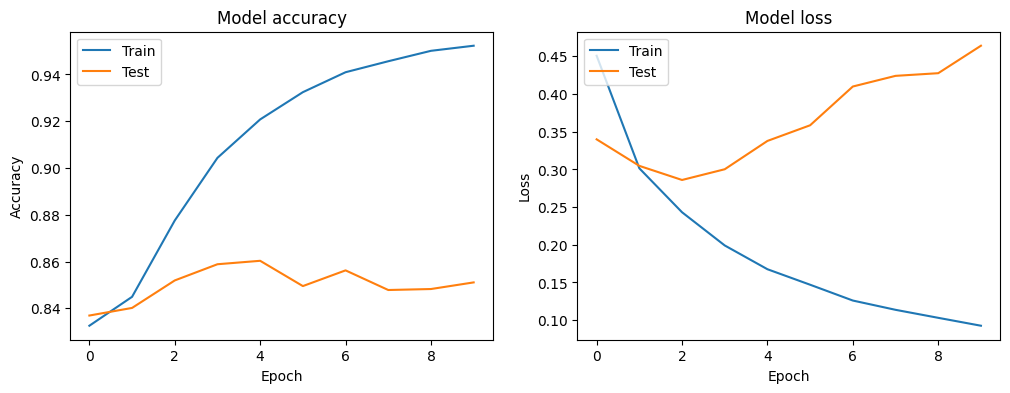

In [ ]:
import matplotlib.pyplot as plt
# Plot the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.47      0.51      1554
           1       0.90      0.92      0.91      7976

    accuracy                           0.85      9530
   macro avg       0.73      0.70      0.71      9530
weighted avg       0.84      0.85      0.85      9530



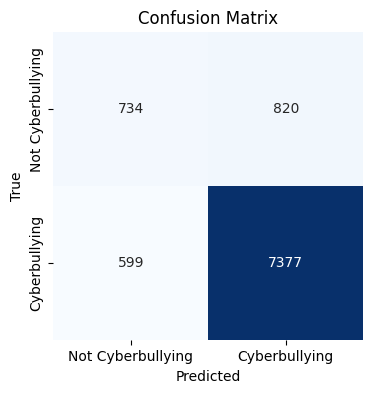

In [ ]:
# Convert predictions to binary labels
binary_predictions = np.round(binary_predictions).astype(int)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, binary_predictions))

# Generate confusion matrix
cm = confusion_matrix(y_test, binary_predictions)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Cyberbullying", "Cyberbullying"],
            yticklabels=["Not Cyberbullying", "Cyberbullying"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

**Testing**

In [ ]:
#Testing
def test_example(example):
    # Preprocess the input example
    no_punctuation = remove_punct(example)
    text_lower = lower(no_punctuation)
    no_stopwords = remove_stopwords(text_lower)
    separate_words = smile_handle(no_stopwords)
    lemmatization = lemmatize(separate_words)
    testing_example = [lemmatization]
    testing_example = tokenizer.texts_to_sequences(testing_example)
    testing_example = pad_sequences(testing_example, maxlen=max_size, padding='post')

    # Make prediction using the model
    predict = model.predict(testing_example)
    predict = np.round(predict).astype(int)
    # Interpret the prediction
    interpretations = {
        0: "Not Cyberbullying",
        1: "Cyberbullying",
    }

    for i in interpretations.keys():
        if i == predict:
            return interpretations[i]

In [ ]:
# Example usage
#example = "Girl bully’s as well. I’ve 2 sons that were bullied in Jr High. Both were bullied by girls. My older was bullied because he had 4ft long brown hair and a baby face. Younger was bullied cuz he hung around the nerd crowd and was an easy target. I know what u mean though! Peace"
example="Now I gotta walk to classss?! I officially hate the stupid bus system! -_-"
prediction = test_example(example)
print("Prediction:", prediction)

1/1 [==============================] - 0s 24ms/step
Prediction: Not Cyberbullying


**Saving and Loading the Trained model**

In [163]:
import tensorflow as tf
model.save('trained_model.h5')

# Loading the model
loaded_model = tf.keras.models.load_model('trained_model.h5')

In [ ]:
#Testing
def test_example(example):
    # Preprocess the input example
    no_punctuation = remove_punct(example)
    text_lower = lower(no_punctuation)
    no_stopwords = remove_stopwords(text_lower)
    separate_words = smile_handle(no_stopwords)
    lemmatization = lemmatize(separate_words)
    testing_example = [lemmatization]
    testing_example = tokenizer.texts_to_sequences(testing_example)
    testing_example = pad_sequences(testing_example, maxlen=max_size, padding='post')

    # Make prediction using the model
    predict = loaded_model.predict(testing_example)
    predict = np.round(predict).astype(int)
    # Interpret the prediction
    interpretations = {
        0: "Not Cyberbullying",
        1: "Cyberbullying",
    }

    for i in interpretations.keys():
        if i == predict:
            return interpretations[i]

In [ ]:
# Example usage
#example = "Girl bully’s as well. I’ve 2 sons that were bullied in Jr High. Both were bullied by girls. My older was bullied because he had 4ft long brown hair and a baby face. Younger was bullied cuz he hung around the nerd crowd and was an easy target. I know what u mean though! Peace"
example="Dou um empurrÃ£o em uma pessoa, isso se chama : - â€º empurrÃ£o. â€º â€º SOCIEDADE: bullying! http://tumblr.com/xun3xycfun"
prediction = test_example(example)
print("Prediction:", prediction)

1/1 [==============================] - 0s 25ms/step
Prediction: Not Cyberbullying
